In [1]:
import tensorflow as tf 
tf.__version__

'2.8.0'

In [2]:
# If tensorflow version >= 2.0, then tensorflow.keras.models 
# If tensorflow version < 2.0, then keras.models

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

from glob import glob

from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.layers import Input,Lambda , Dense , Flatten

from tensorflow.keras.applications.resnet import ResNet50,preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img


### 1. Resizing the images and defining the train and test path 

In [3]:
# Consider the image size

image_size = [224,224]

# we can mention any image size if image pixel is high then we can mention that pixel to be less
# else it should be depending on the image that we have.

train_path='D:\Sandesh\Data Science\Deep Learning\Car_image classification\Datasets\Train'
test_path='D:\Sandesh\Data Science\Deep Learning\Car_image classification\Datasets\Test'


### 2. Define the ResNet Model and removing the input and o/p layers from ResNet Model and Dont train the weights of layers.

In [4]:
# We dont have 100 classes to classify hence pending on the problem we can give as 
# True or false , if we have 1000 classes = True else False.

# Use the weights of imagenet dataset.
# Converting the image to RGB. 


resnet  = ResNet50(include_top=False,
                    weights='imagenet',
                    input_shape=image_size +[3])


In [5]:
# Input and output layers are not available.

resnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

                                                                                                  
 conv2_block3_1_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_2_conv (Conv2D)   (None, 56, 56, 64)   36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 56, 56, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv3_block3_1_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_2_conv (Conv2D)   (None, 28, 28, 128)  147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv4_block2_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block2_1_relu[0][0]']    
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_2_conv[0][0]']    
 ization) 

 conv4_block5_1_conv (Conv2D)   (None, 14, 14, 256)  262400      ['conv4_block4_out[0][0]']       
                                                                                                  
 conv4_block5_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block5_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block5_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block5_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block5_1_relu[0][0]']    
                                                                                                  
 conv4_blo

                                                                  'conv5_block1_3_bn[0][0]']      
                                                                                                  
 conv5_block1_out (Activation)  (None, 7, 7, 2048)   0           ['conv5_block1_add[0][0]']       
                                                                                                  
 conv5_block2_1_conv (Conv2D)   (None, 7, 7, 512)    1049088     ['conv5_block1_out[0][0]']       
                                                                                                  
 conv5_block2_1_bn (BatchNormal  (None, 7, 7, 512)   2048        ['conv5_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_1_relu (Activatio  (None, 7, 7, 512)   0           ['conv5_block2_1_bn[0][0]']      
 n)       

In [6]:
for layer in resnet.layers:
    layer.trainable=False
    

### 3. Adding the input and output layers to ResNet Model and flattening the output layer 

In [7]:
# To get the no of classes available 
folders = glob('D:\Sandesh\Data Science\Deep Learning\Car_image classification\Datasets\Train/*')
folders

['D:\\Sandesh\\Data Science\\Deep Learning\\Car_image classification\\Datasets\\Train\\audi',
 'D:\\Sandesh\\Data Science\\Deep Learning\\Car_image classification\\Datasets\\Train\\lamborghini',
 'D:\\Sandesh\\Data Science\\Deep Learning\\Car_image classification\\Datasets\\Train\\mercedes']

In [8]:
x=Flatten()(resnet.output)

In [9]:
prediction = Dense(len(folders),activation='softmax')(x)
model = Model(inputs=resnet.input,outputs = prediction)

In [10]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

                                                                                                  
 conv2_block3_1_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_2_conv (Conv2D)   (None, 56, 56, 64)   36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 56, 56, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv3_block3_1_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_2_conv (Conv2D)   (None, 28, 28, 128)  147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv4_block2_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block2_1_relu[0][0]']    
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_2_conv[0][0]']    
 ization) 

 conv4_block5_1_conv (Conv2D)   (None, 14, 14, 256)  262400      ['conv4_block4_out[0][0]']       
                                                                                                  
 conv4_block5_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block5_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block5_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block5_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block5_1_relu[0][0]']    
                                                                                                  
 conv4_blo

                                                                  'conv5_block1_3_bn[0][0]']      
                                                                                                  
 conv5_block1_out (Activation)  (None, 7, 7, 2048)   0           ['conv5_block1_add[0][0]']       
                                                                                                  
 conv5_block2_1_conv (Conv2D)   (None, 7, 7, 512)    1049088     ['conv5_block1_out[0][0]']       
                                                                                                  
 conv5_block2_1_bn (BatchNormal  (None, 7, 7, 512)   2048        ['conv5_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_1_relu (Activatio  (None, 7, 7, 512)   0           ['conv5_block2_1_bn[0][0]']      
 n)       

In [11]:
model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy'],
)

### 4. Generate  Different Images using Image Generator only for training data not for test data 

In [12]:
# Diff images will be generated only for training , not for test data.
# Rescale the images for both .

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_data_gen = ImageDataGenerator(rescale=1./255,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True)

test_data_gen = ImageDataGenerator(rescale=1./255)



In [13]:
training_set = train_data_gen.flow_from_directory(directory=train_path,
                                        target_size=(224, 224),
                                        class_mode='categorical',
                                        batch_size=32,
                                        shuffle=True,
                                        seed=None)

Found 64 images belonging to 3 classes.


In [14]:
test_set = test_data_gen.flow_from_directory(directory=test_path,
                                        target_size=(224, 224),
                                        class_mode='categorical',
                                        batch_size=32,
                                        shuffle=True,
                                        seed=None)

Found 58 images belonging to 3 classes.


### 5. Training the Model 

In [15]:
r = model.fit_generator(generator=training_set,
    steps_per_epoch=len(training_set),
    epochs=50,
    verbose=1,
    validation_data=test_set,
    validation_steps=len(test_set),
    shuffle=True
)

Epoch 1/50
2/2 [==============================] - 9s 5s/step - loss: 4.3321 - accuracy: 0.4062 - val_loss: 21.3534 - val_accuracy: 0.1552
Epoch 2/50
2/2 [==============================] - 6s 4s/step - loss: 14.1015 - accuracy: 0.3125 - val_loss: 11.3946 - val_accuracy: 0.1552
Epoch 3/50
2/2 [==============================] - 6s 4s/step - loss: 7.2605 - accuracy: 0.3906 - val_loss: 8.3742 - val_accuracy: 0.3276
Epoch 4/50
2/2 [==============================] - 7s 5s/step - loss: 6.0617 - accuracy: 0.3906 - val_loss: 6.0661 - val_accuracy: 0.5172
Epoch 5/50
2/2 [==============================] - 7s 5s/step - loss: 9.6159 - accuracy: 0.2969 - val_loss: 6.4521 - val_accuracy: 0.5172
Epoch 6/50
2/2 [==============================] - 7s 5s/step - loss: 6.6152 - accuracy: 0.3281 - val_loss: 1.0821 - val_accuracy: 0.5172
Epoch 7/50
2/2 [==============================] - 7s 5s/step - loss: 2.3621 - accuracy: 0.5000 - val_loss: 7.1702 - val_accuracy: 0.3793
Epoch 8/50
2/2 [======================

In [16]:
r.history

{'loss': [4.332118034362793,
  14.101518630981445,
  7.2604804039001465,
  6.061652660369873,
  9.615934371948242,
  6.6151957511901855,
  2.3621296882629395,
  4.694004058837891,
  5.552361011505127,
  4.502396106719971,
  1.788289189338684,
  1.6844569444656372,
  2.4936492443084717,
  0.9344266653060913,
  1.9490697383880615,
  1.9354214668273926,
  0.7199862599372864,
  1.353797197341919,
  0.855009913444519,
  0.7334400415420532,
  1.1241099834442139,
  0.5459083914756775,
  0.8044978380203247,
  0.573499321937561,
  0.48493412137031555,
  0.5567039251327515,
  0.41730624437332153,
  0.5095047354698181,
  0.3868553936481476,
  0.3989359438419342,
  0.3801887333393097,
  0.3370265066623688,
  0.3178122639656067,
  0.3105630576610565,
  0.29470688104629517,
  0.3074643015861511,
  0.24054056406021118,
  0.2889605164527893,
  0.28028079867362976,
  0.2505626976490021,
  0.2616187334060669,
  0.29545342922210693,
  0.24537354707717896,
  0.2544938325881958,
  0.19163575768470764,
  0.

### 6. Plot the train and test accuracy 

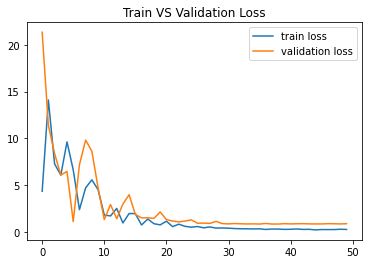

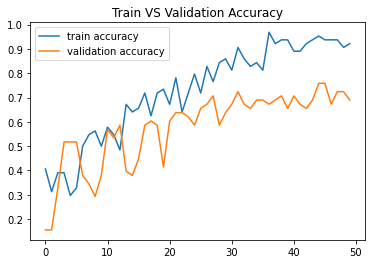

In [19]:

# Train and Test / validation Loss
plt.plot(r.history['loss'],label='train loss')
plt.plot(r.history['val_loss'],label='validation loss')
plt.title('Train VS Validation Loss')
plt.legend()
plt.show()

# Train and Test / validation accuracy
plt.plot(r.history['accuracy'],label='train accuracy')
plt.plot(r.history['val_accuracy'],label='validation accuracy')
plt.title('Train VS Validation Accuracy')
plt.legend()
plt.show()


In [22]:

from tensorflow.keras.models import load_model

model.save('model_resnet_practice.h5')


In [23]:
y_pred=model.predict(test_set)
y_pred=np.argmax(y_pred,axis=1)
y_pred

array([2, 0, 0, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 0, 1, 2, 1, 2, 2, 1,
       2, 1, 1, 1, 0, 2, 1, 1, 1, 2, 1, 1, 0, 1, 2, 2, 2, 1, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 2, 1, 1, 2, 0], dtype=int64)

### Predicting the Test UseCase 

    1. Convert the images into Array 
    2. Rescale the images by dividing the values by 255.
    3. Convert the images into 4 channels by expand_dimensions.
    

In [24]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image 

In [25]:
model=load_model('model_resnet_practice.h5')

In [30]:
img=image.load_img('D:/Sandesh/Data Science/Deep Learning/Car_image classification/Datasets/Test/mercedes/31.jpg',target_size=(224,224))


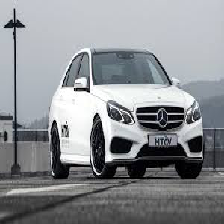

In [31]:
img

In [34]:

from keras.applications.vgg16 import preprocess_input

# Convert the image into array of [224,224,3] and then divide it by 255 to convert it into 0 and 1.
image_array=image.img_to_array(img)
image_array=image_array/255
image_array.shape

(224, 224, 3)

In [35]:
# The preprocess_input function is meant to adequate your image to the format the model requires
# To add 1 at the starting of the array
x=np.expand_dims(image_array,axis=0)
img_data = preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [28]:
y_test_predict = model.predict(img_data)
np.argmax(y_test_predict)

2

### THE END 